In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
df  = pd.read_csv("Ratings1.csv")
df.head()

brand                                         categories manufacturer  \
0  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...       Amazon   
1  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...       Amazon   
2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...       Amazon   
3  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...       Amazon   
4  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...       Amazon   

   reviews.rating                                       reviews.text  
0               5  This product so far has not disappointed. My c...  
1               5  great for beginner or experienced person. Boug...  
2               5  Inexpensive tablet for him to use and learn on...  
3               4  I've had my Fire HD 8 two weeks now and I love...  
4               5  I bought this for my grand daughter when she c...

In [4]:
df.shape

(26980, 5)

In [5]:
df.dtypes

brand             object
categories        object
manufacturer      object
reviews.rating     int64
reviews.text      object
dtype: object

In [6]:
df.keys()

Index(['brand', 'categories', 'manufacturer', 'reviews.rating',
       'reviews.text'],
      dtype='object')

In [7]:
df.describe()

reviews.rating
count    26980.000000
mean         4.514122
std          0.775702
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000

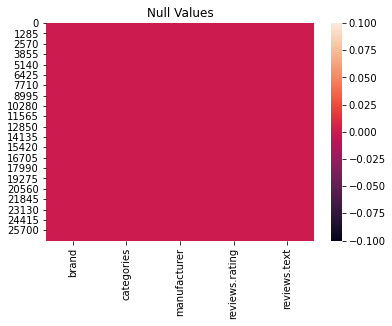

In [8]:
df.isnull().sum()
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [9]:
df.isnull().sum()

brand             0
categories        0
manufacturer      0
reviews.rating    0
reviews.text      0
dtype: int64

<AxesSubplot:>

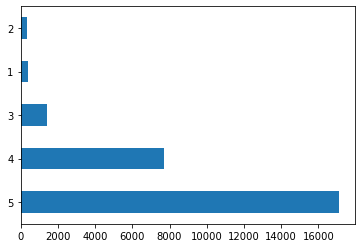

In [10]:
df['reviews.rating'].value_counts().plot(kind='barh')

In [11]:
df['brand'].value_counts()

Amazon                          26563
Amazon Echo                       210
Amazon Fire Tv                    123
Amazon Fire                        78
Amazon Digital Services Inc.        5
Amazon Coco T                       1
Name: brand, dtype: int64

In [12]:
df['categories'].value_counts()

Fire Tablets,Tablets,Computers & Tablets,All Tablets,Electronics, Tech Toys, Movies, Music,Electronics,iPad & Tablets,Android Tablets,Frys                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               10966
Stereos,Remote Controls,Amazon Echo,Audio Docks & Mini Speakers,Amazon Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,H

C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


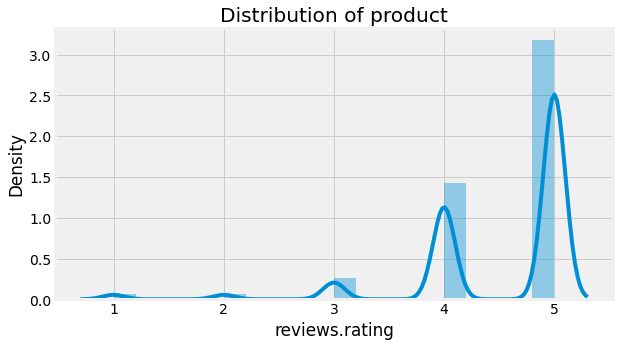

In [13]:
# Creating a distribution plot for 'rate'

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df['reviews.rating'], bins=20)
plt.title('Distribution of product')
plt.show()

In [14]:
df['categories'].unique()

array(['Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets',
       'eBook Readers,Kindle E-readers,Computers & Tablets,E-Readers & Accessories,E-Readers',
       'Electronics,eBook Readers & Accessories,Covers,Kindle Store,Amazon Device Accessories,Kindle E-Reader Accessories,Kindle (5th Generation) Accessories,Kindle (5th Generation) Covers',
       'Kindle Store,Amazon Devices,Electronics',
       'Tablets,Fire Tablets,Electronics,Computers,Computer Components,Hard Drives & Storage,Computers & Tablets,All Tablets',
       'Tablets,Fire Tablets,Computers & Tablets,All Tablets',
       'Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories',
       'Electronics,iPad & Tablets,All Tablets,Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,E-Readers & Accessories,E-Readers,Used:Computers Accessories,Used:Tablets,Computers,iPads Tablets,Kind

In [15]:
df['brand'].unique()

array(['Amazon', 'Amazon Fire', 'Amazon Echo', 'Amazon Coco T',
       'Amazon Fire Tv', 'Amazon Digital Services Inc.'], dtype=object)

In [16]:
df['manufacturer'].unique()

array(['Amazon', 'Amazon Digital Services, Inc'], dtype=object)

C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


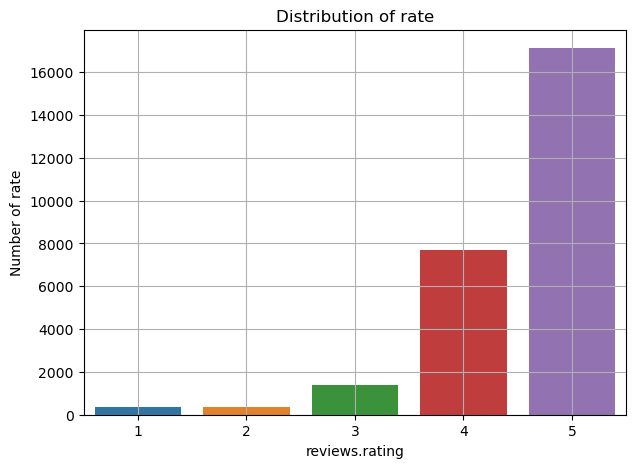

In [17]:
# Creating a barplot for ''rate
rate = df['reviews.rating'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(rate.index, rate.values)
plt.title('Distribution of rate')
plt.xlabel('reviews.rating')
plt.ylabel('Number of rate')
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


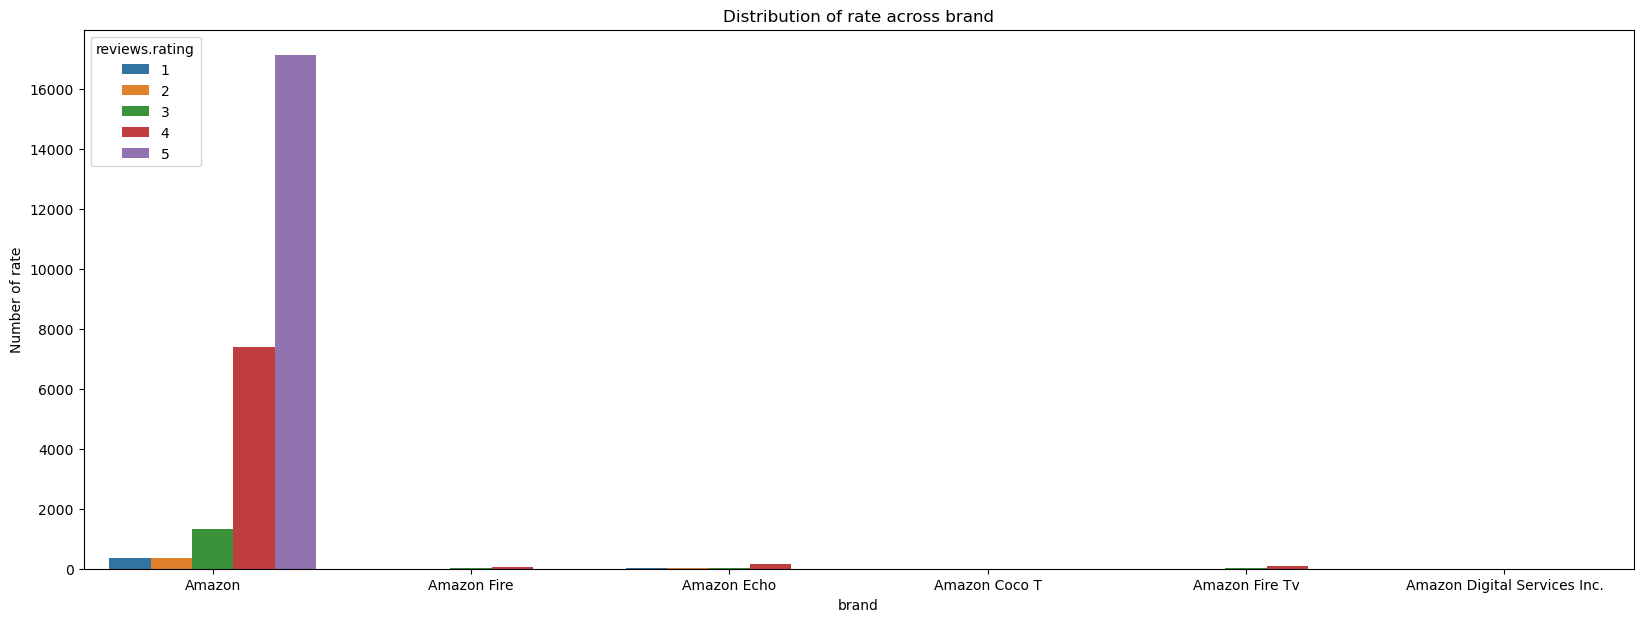

In [18]:
# creating countplot of ratings over brand
plt.figure(figsize=(20,7))
sns.countplot(df['brand'],hue=df['reviews.rating'])
plt.title('Distribution of rate across brand')
plt.xlabel('brand')
plt.ylabel('Number of rate')
plt.show()

In [19]:
df=pd.get_dummies(df,columns=['brand','categories','manufacturer'])

In [20]:
df.head()

reviews.rating                                       reviews.text  \
0               5  This product so far has not disappointed. My c...   
1               5  great for beginner or experienced person. Boug...   
2               5  Inexpensive tablet for him to use and learn on...   
3               4  I've had my Fire HD 8 two weeks now and I love...   
4               5  I bought this for my grand daughter when she c...   

   brand_Amazon  brand_Amazon Coco T  brand_Amazon Digital Services Inc.  \
0             1                    0                                   0   
1             1                    0                                   0   
2             1                    0                                   0   
3             1                    0                                   0   
4             1                    0                                   0   

   brand_Amazon Echo  brand_Amazon Fire  brand_Amazon Fire Tv  \
0                  0                  0                     0   
1                  0                  0                     0   
2                  0                  0                     0   
3                  0                  0                     0   
4                  0                  0                     0   

   categories_Amazon Device Accessories,Kindle Store,Kindle Touch (4th Generation) Accessories,Kindle E-Reader Accessories,Covers,Kindle Touch (4th Generation) Covers  \
0                                                  0                                                                                                                     
1                                                  0                                                                                                                     
2                                                  0                                                                                                                     
3                                                  0                                                                                                                     
4                                                  0                                                                                                                     

   categories_Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories  \
0                                                  0                                                                                                                  
1                                                  0                                                                                                                  
2                                                  0                                                                                                                  
3                                                  0                                                                                                                  
4                                                  0                                                                                                                  

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   categories_Stereos,Remote Controls,Amazon Echo,Audio Docks & Mini Speakers,Amazon Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,Home Security,Kindle Store,Home Automation,Home, Garage & Office,Home,Voice-Enabled Smart Assistants,Virtual Assistant Speakers,Portable Audio & Headphones,Electronics Features,Amazon Device Accessories,iPod, Audio Player Accessories,Home & Furniture Clearance,Consumer Electronics,Smart Home,Surveillance,Home Improvement,Smart Home & Home Automation Devices

In [21]:
sns.pairplot(df)

<AxesSubplot:>

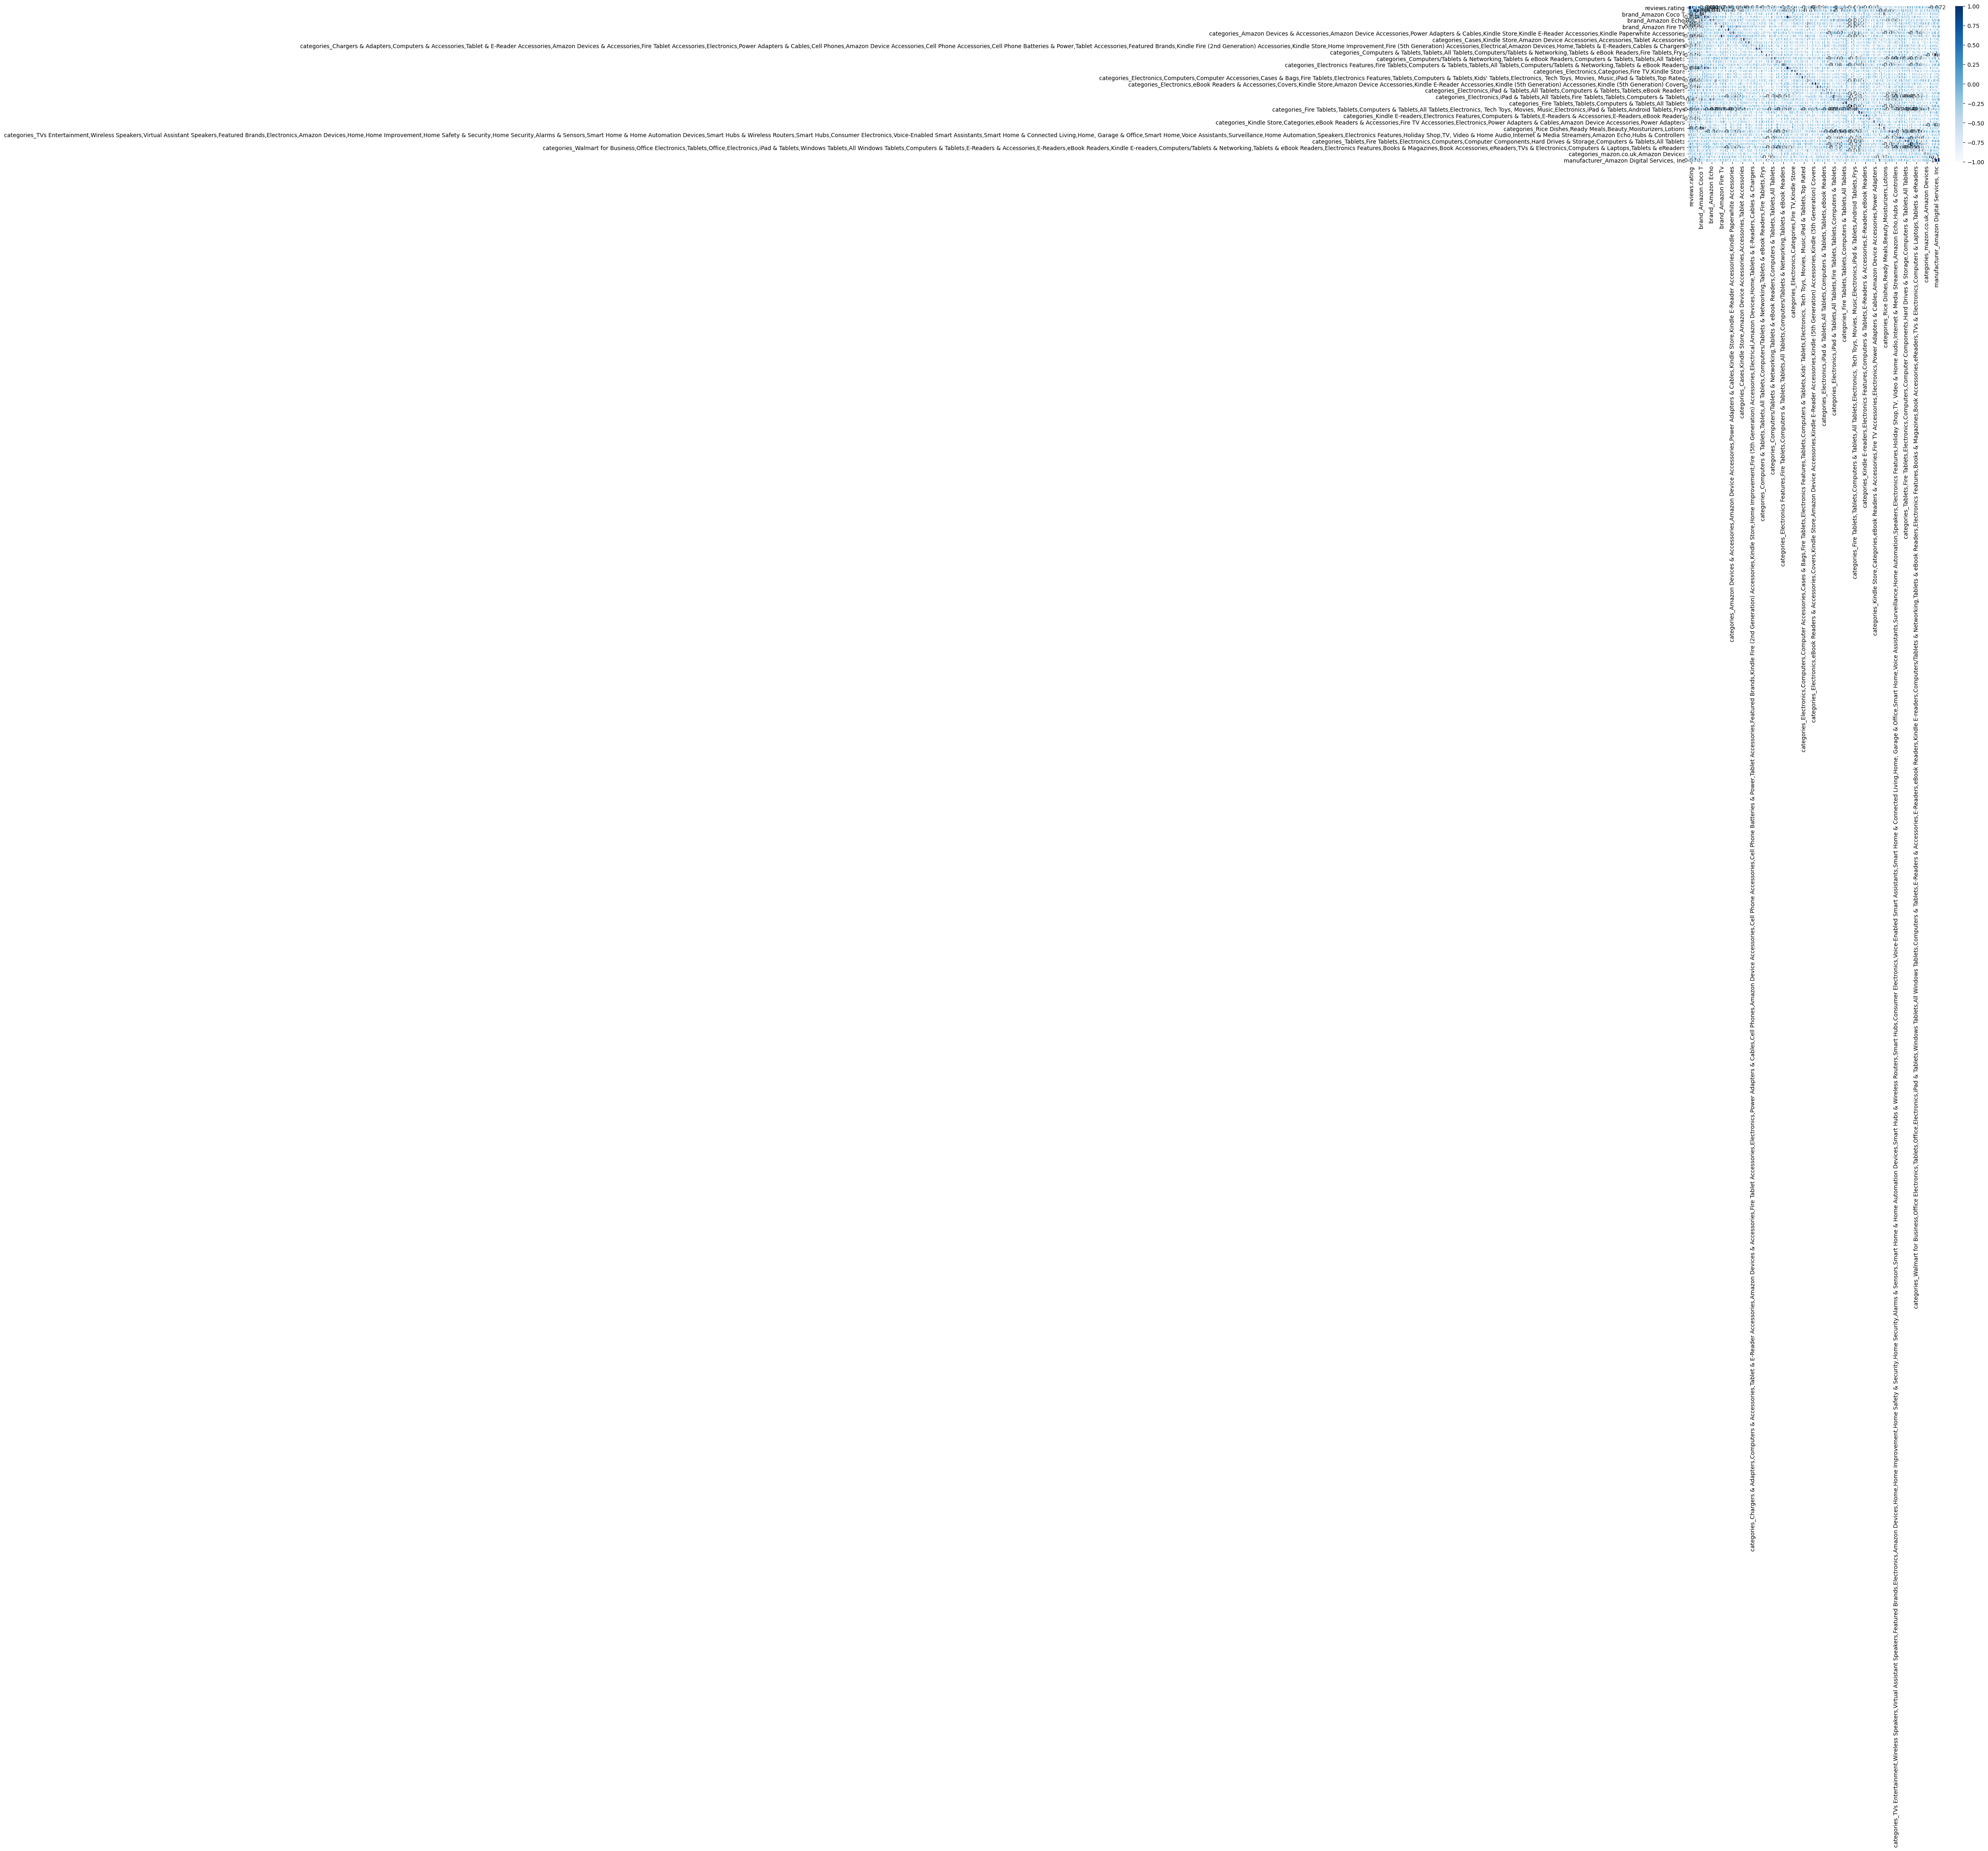

In [22]:
fig=plt.figure(figsize=(10,5))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")

In [23]:
x = df.drop('reviews.rating', axis=1)
y = df['reviews.rating']

In [24]:
print(x.shape)
print(y.shape)

(26980, 49)
(26980,)


In [25]:
x = x.drop(['reviews.text'], axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
x.dtypes

brand_Amazon                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        uint8
brand_Amazon Coco T                                                                                                                                                                                                                                           

In [28]:
#for col in x.columns:
 #   scaler = StandardScaler()
  #  x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))

In [29]:
x.corr()

brand_Amazon  \
brand_Amazon                                            1.000000   
brand_Amazon Coco T                                    -0.048591   
brand_Amazon Digital Services Inc.                     -0.108661   
brand_Amazon Echo                                      -0.706897   
brand_Amazon Fire                                      -0.429760   
brand_Amazon Fire Tv                                   -0.540125   
categories_Amazon Device Accessories,Kindle Sto...      0.001869   
categories_Amazon Devices & Accessories,Amazon ...      0.015409   
categories_Back To College,College Electronics,...     -0.540125   
categories_Cases,Kindle Store,Amazon Device Acc...      0.001869   
categories_Categories,Streaming Media Players,E...      0.002158   
categories_Chargers & Adapters,Computers & Acce...      0.003660   
categories_Computers & Tablets,E-Readers & Acce...      0.005453   
categories_Computers & Tablets,Tablets,All Tabl...      0.002413   
categories_Computers/Tablets & Networking,Table...      0.002289   
categories_Computers/Tablets & Networking,Table...      0.025063   
categories_Computers/Tablets & Networking,Table...      0.001526   
categories_Electronics Features,Fire Tablets,Co...      0.014815   
categories_Electronics,Amazon Device Accessorie...     -0.108661   
categories_Electronics,Categories,Fire TV,Kindl...      0.001321   
categories_Electronics,Categories,Streaming Med...      0.001869   
categories_Electronics,Computers,Computer Acces...      0.001869   
categories_Electronics,Tablets & E-Readers,Tabl...     -0.429760   
categories_Electronics,eBook Readers & Accessor...      0.001706   
categories_Electronics,eBook Readers & Accessor...      0.002530   
categories_Electronics,iPad & Tablets,All Table...      0.004180   
categories_Electronics,iPad & Tablets,All Table...      0.011150   
categories_Electronics,iPad & Tablets,All Table...      0.042755   
categories_Featured Brands,Electronics,Amazon D...     -0.706897   
categories_Fire Tablets,Tablets,Computers & Tab...      0.002018   
categories_Fire Tablets,Tablets,Computers & Tab...      0.012597   
categories_Fire Tablets,Tablets,Computers & Tab...      0.103682   
categories_Frys,Software & Books,eReaders & Acc...      0.001079   
categories_Kindle E-readers,Electronics Feature...      0.001869   
categories_Kindle Store,Amazon Devices,Electronics      0.003326   
categories_Kindle Store,Categories,eBook Reader...      0.003052   
categories_Power Adapters & Cables,Electronics,...      0.000763   
categories_Rice Dishes,Ready Meals,Beauty,Moist...     -0.048591   
categories_Stereos,Remote Controls,Amazon Echo,...      0.056491   
categories_TVs Entertainment,Wireless Speakers,...      0.001321   
categories_Tablets,Fire Tablets,Computers & Tab...      0.032481   
categories_Tablets,Fire Tablets,Electronics,Com...      0.009616   
categories_Walmart for Business,Office Electron...      0.018571   
categories_Walmart for Business,Office Electron...      0.045766   
categories_eBook Readers,Kindle E-readers,Compu...      0.006252   
categories_mazon.co.uk,Amazon Devices                   0.003326   
manufacturer_Amazon                                    -0.002413   
manufacturer_Amazon Digital Services, Inc               0.002413   

                                                    brand_Amazon Coco T  \
brand_Amazon                                                  -0.048591   
brand_Amazon Coco T                                            1.000000   
brand_Amazon Digital Services Inc.                            -0.000083   
brand_Amazon Echo                                             -0.000539   
brand_Amazon Fire                                             -0.000328   
brand_Amazon Fire Tv                                          -0.000412   
categories_Amazon Device Accessories,Kindle Sto...            -0.000091   
categories_Amazon Devices & Accessories,Amazon ...            -0.000749   
categories_Back To College,College Electroni

In [30]:
x.skew()

brand_Amazon                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         -7.856386
brand_Amazon Coco T                                                                                                                                                                                                                                      

C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


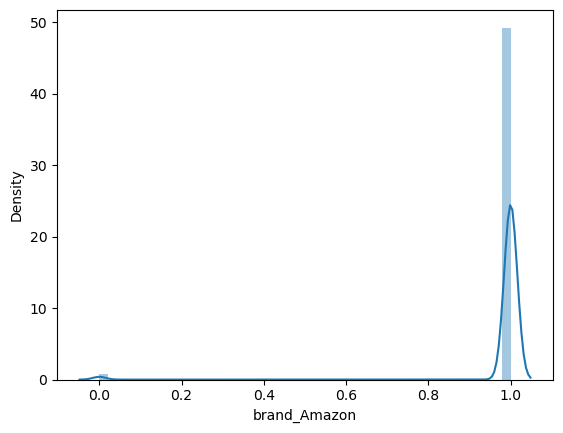

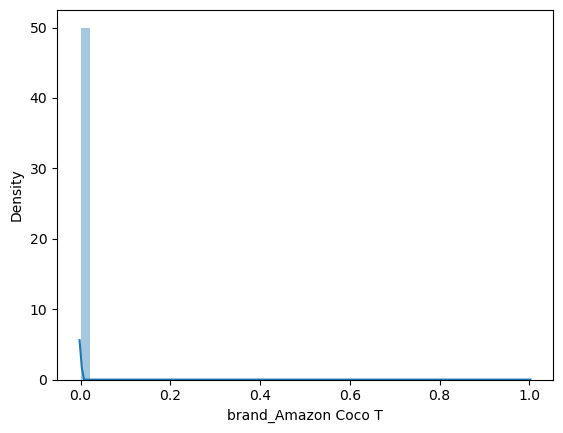

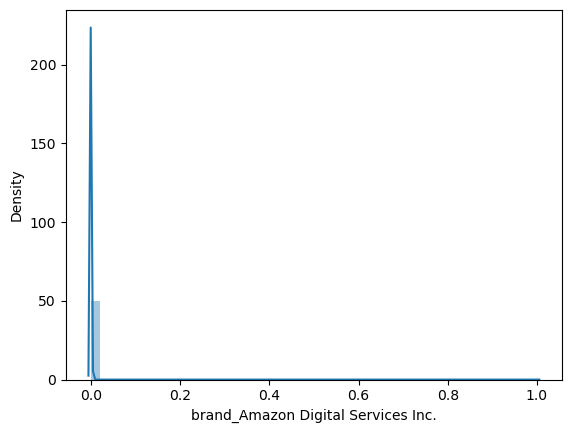

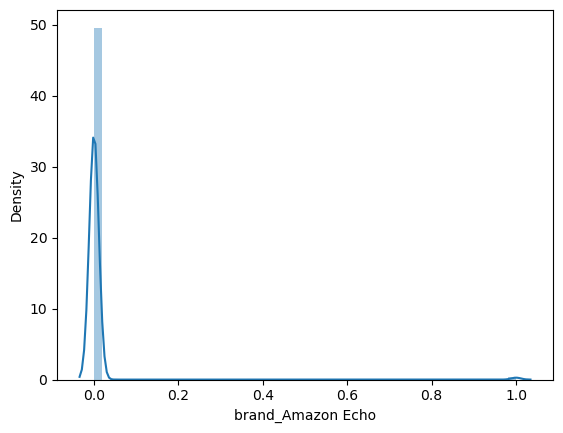

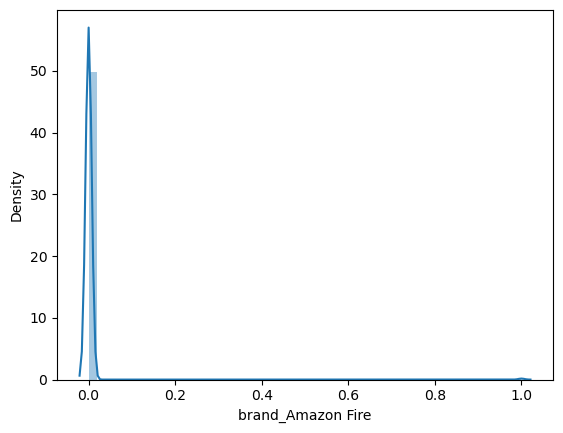

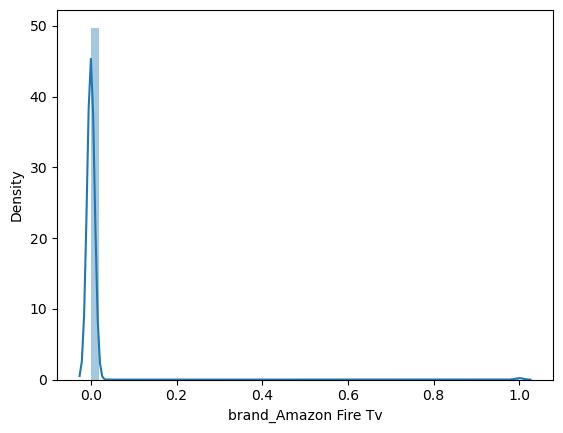

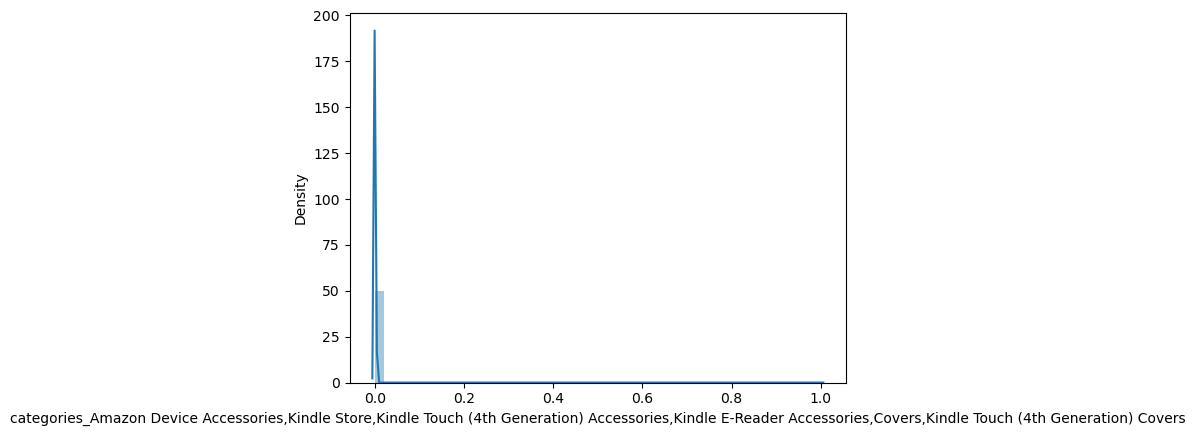

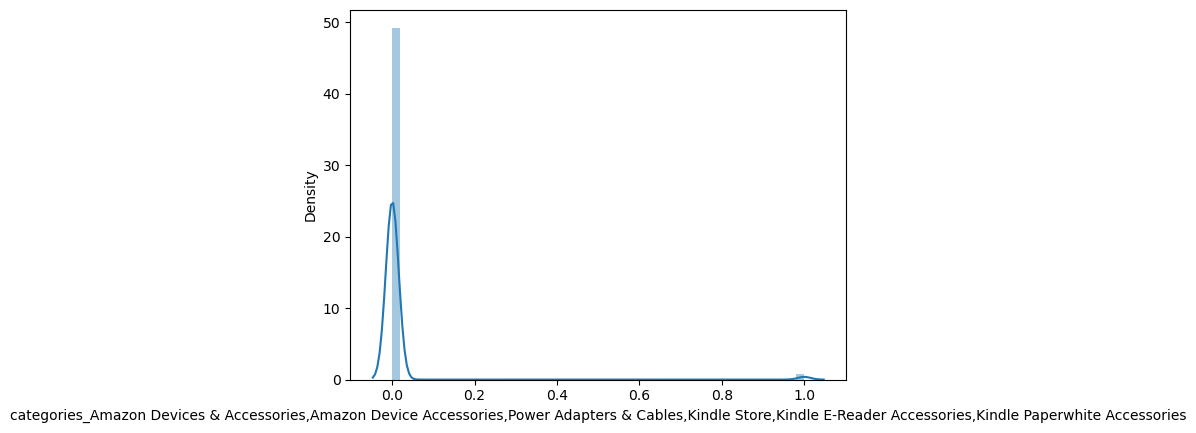

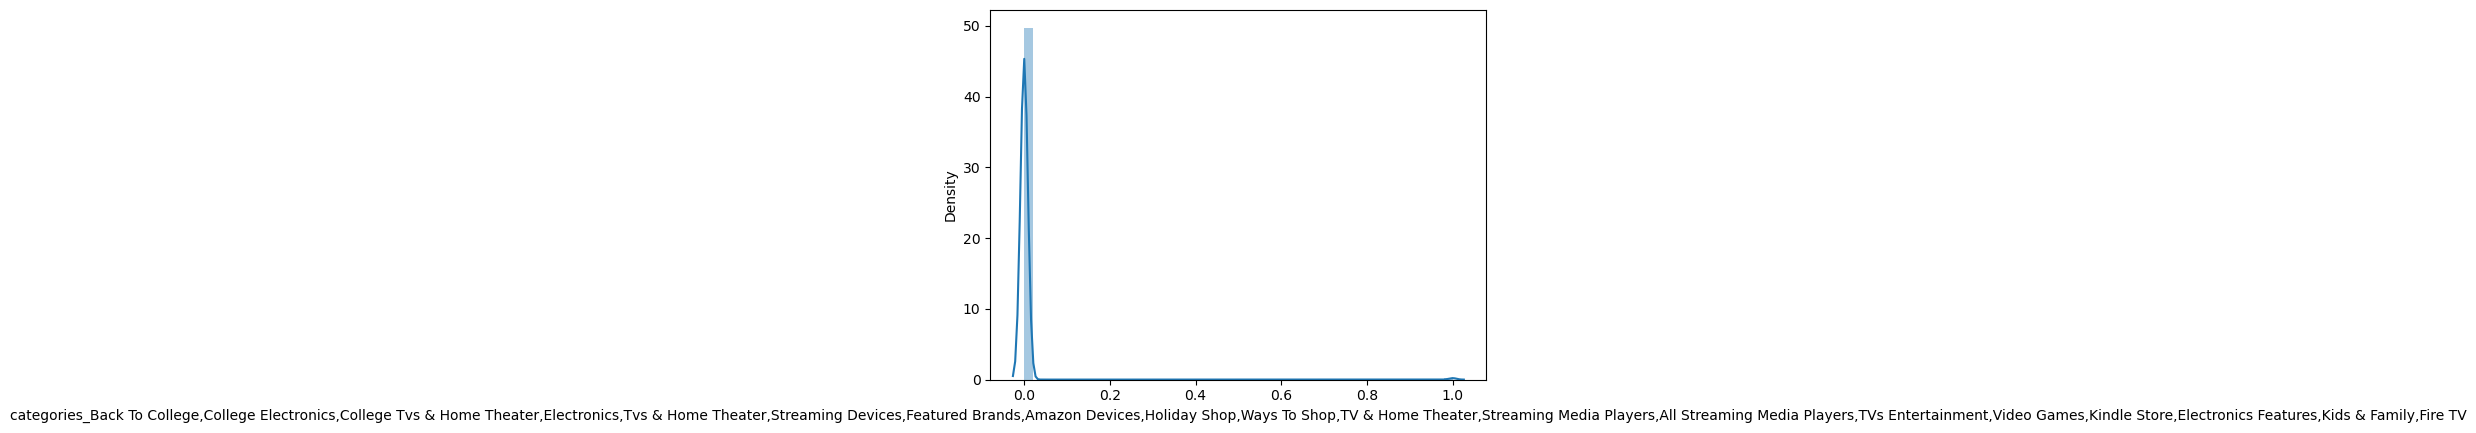

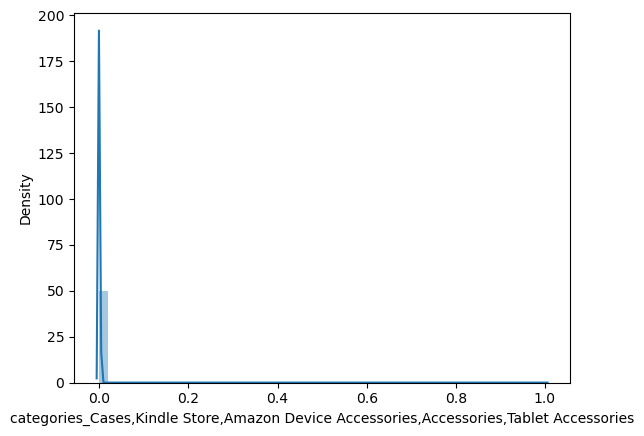

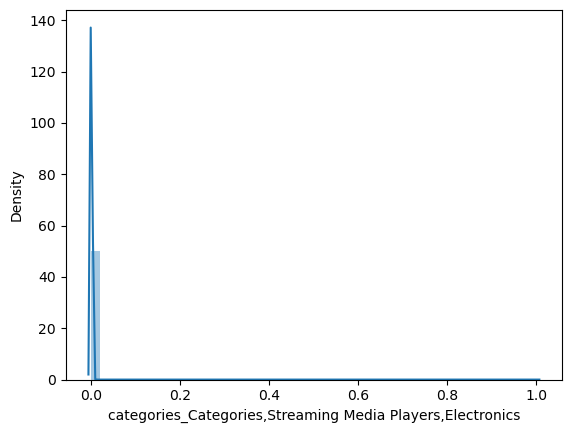

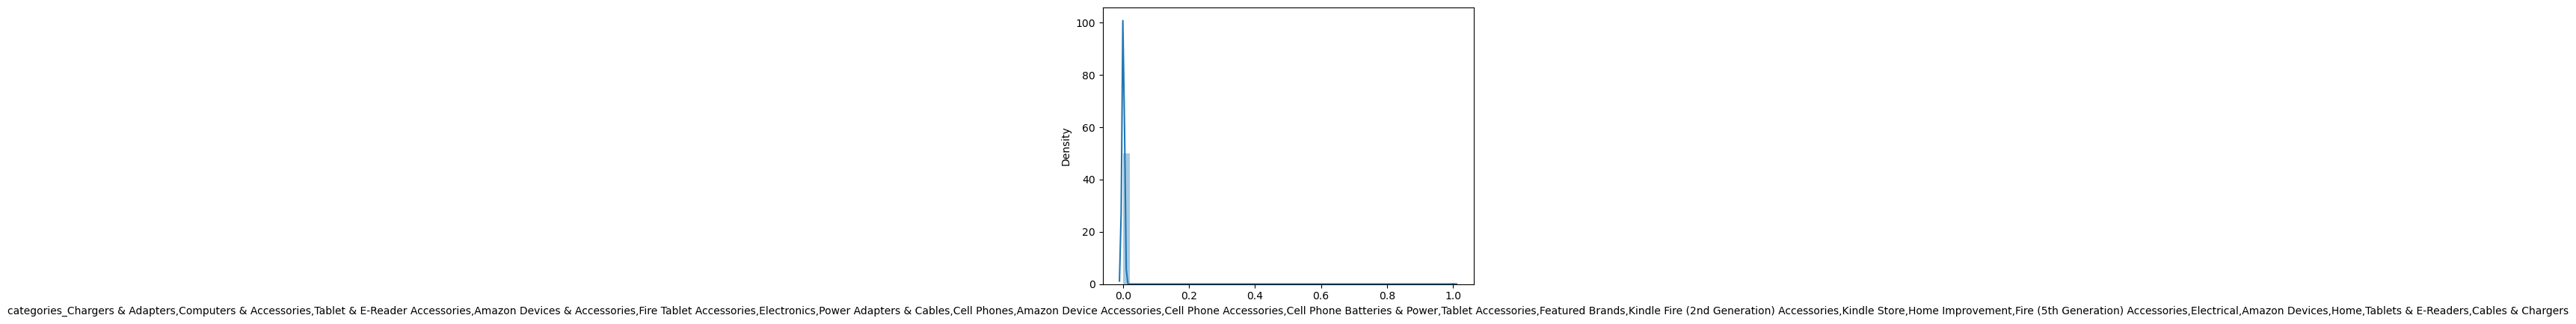

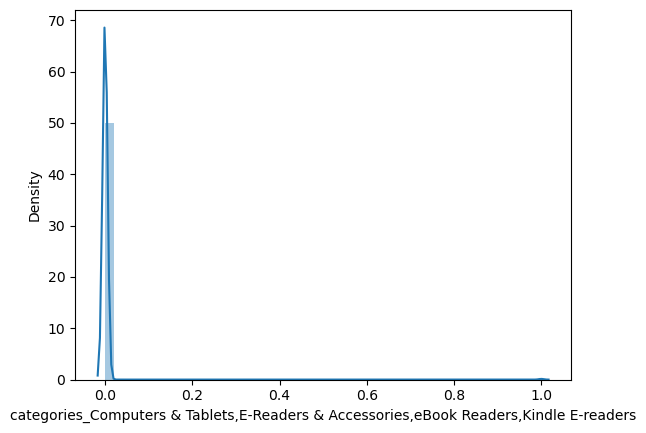

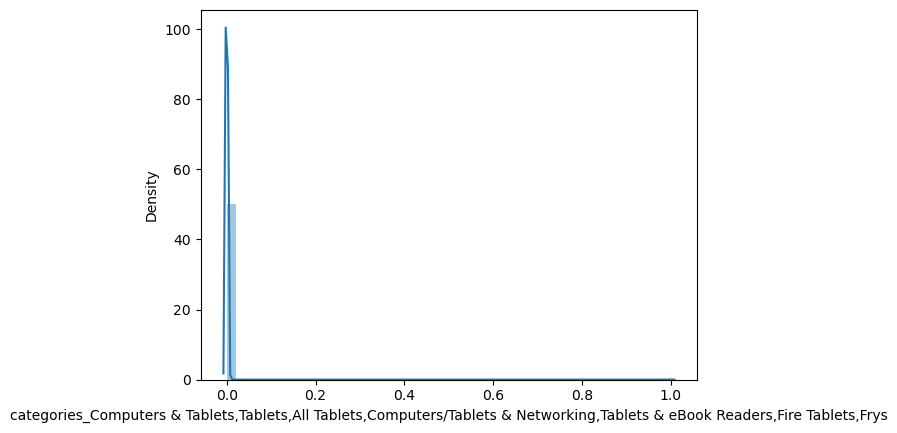

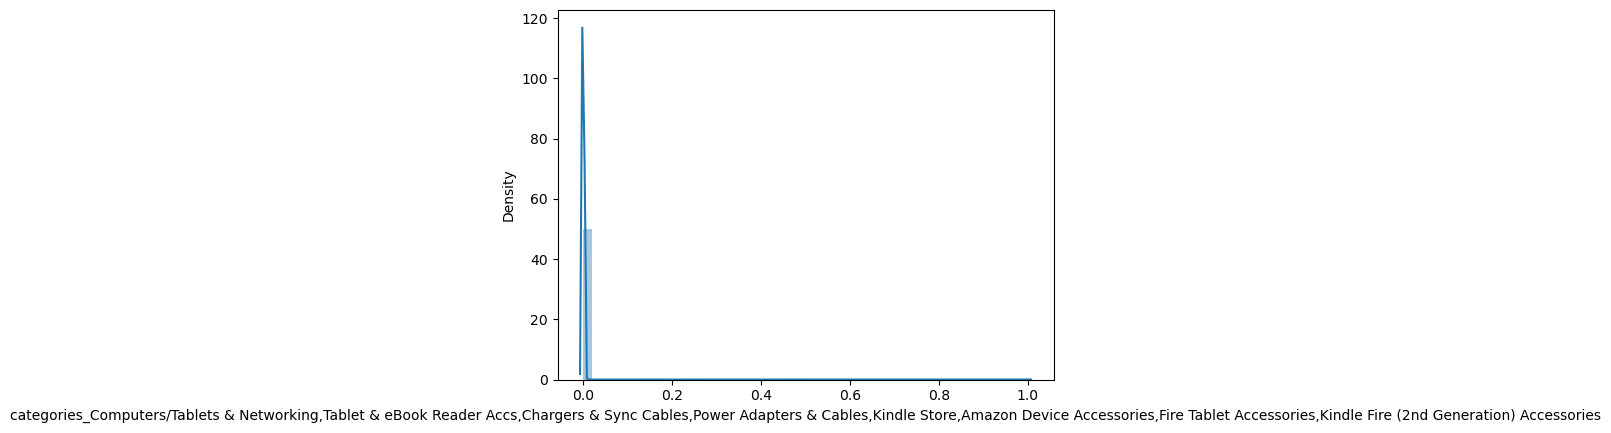

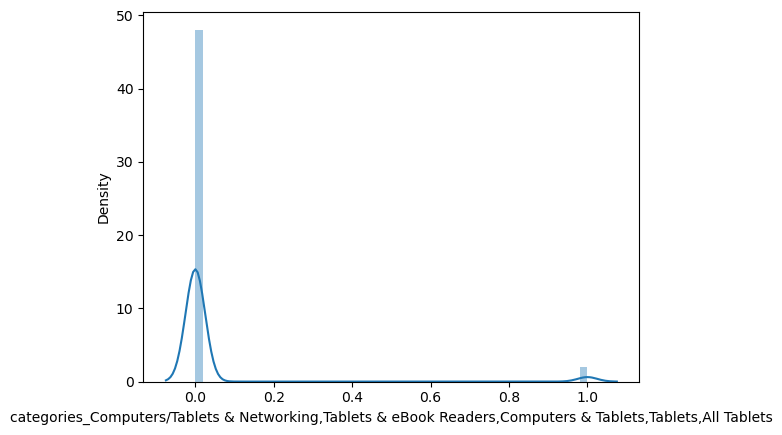

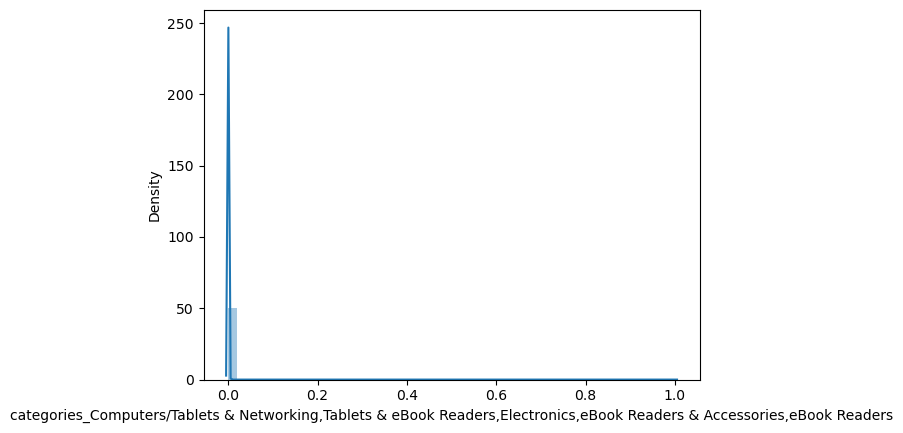

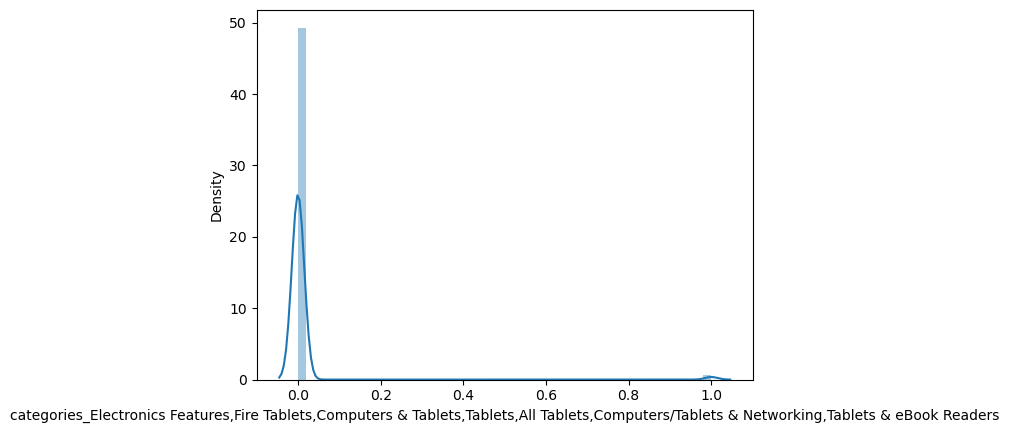

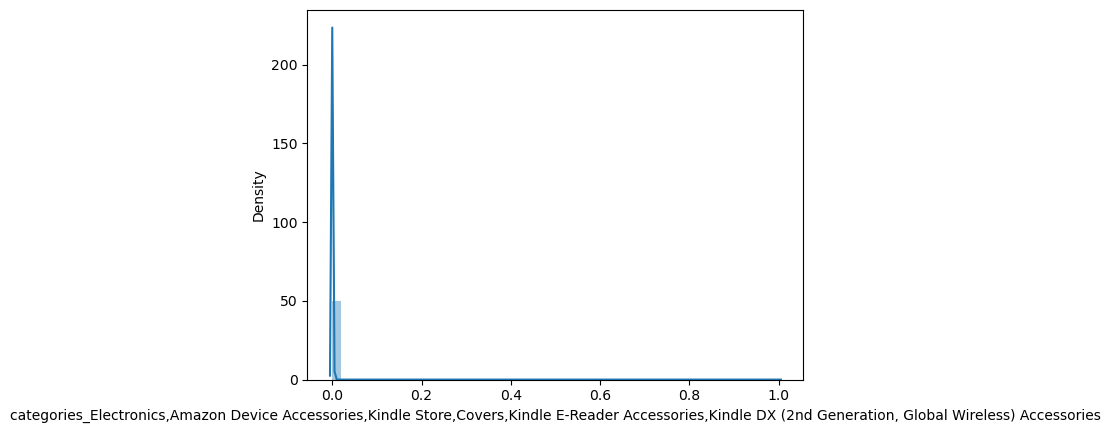

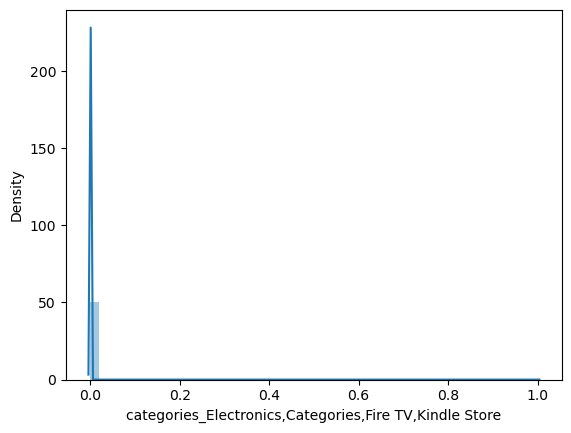

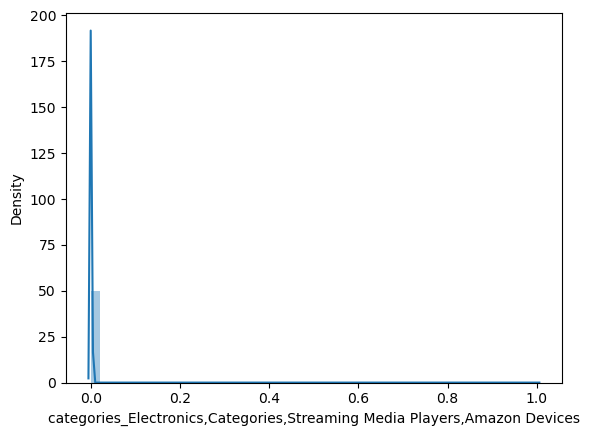

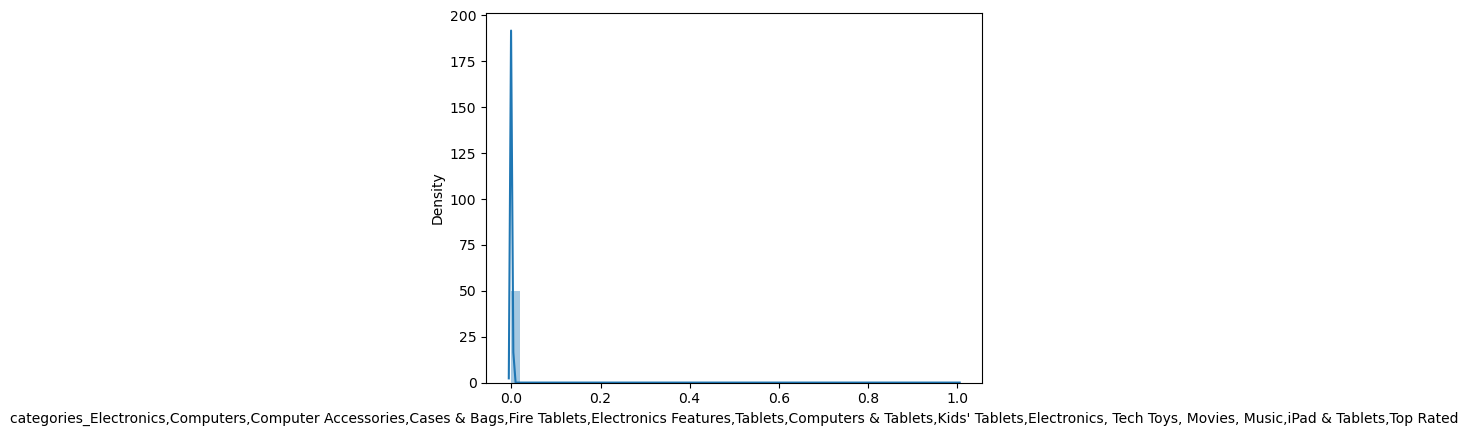

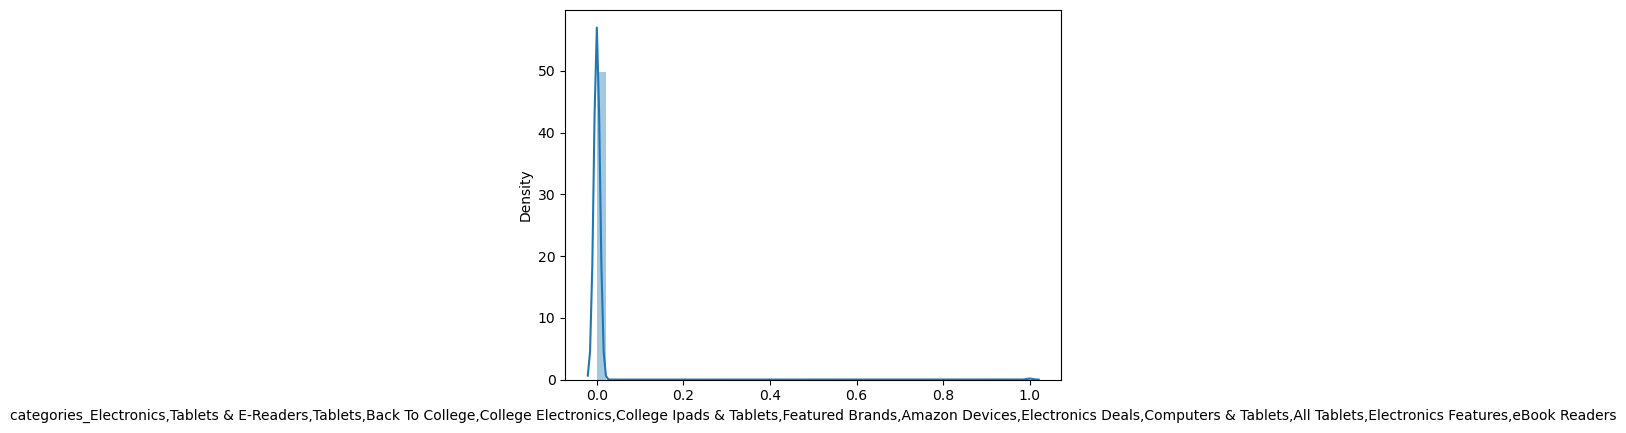

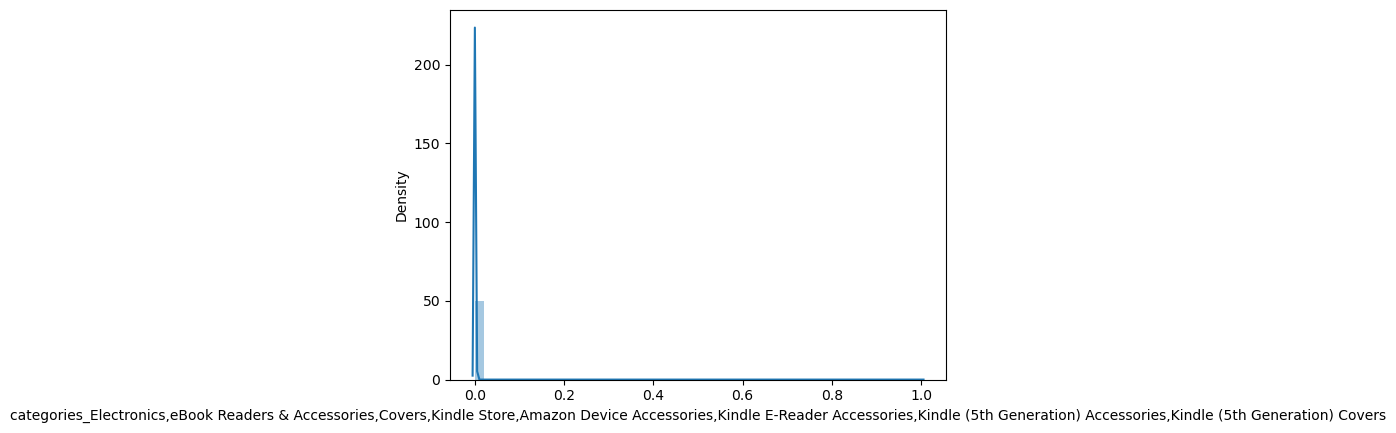

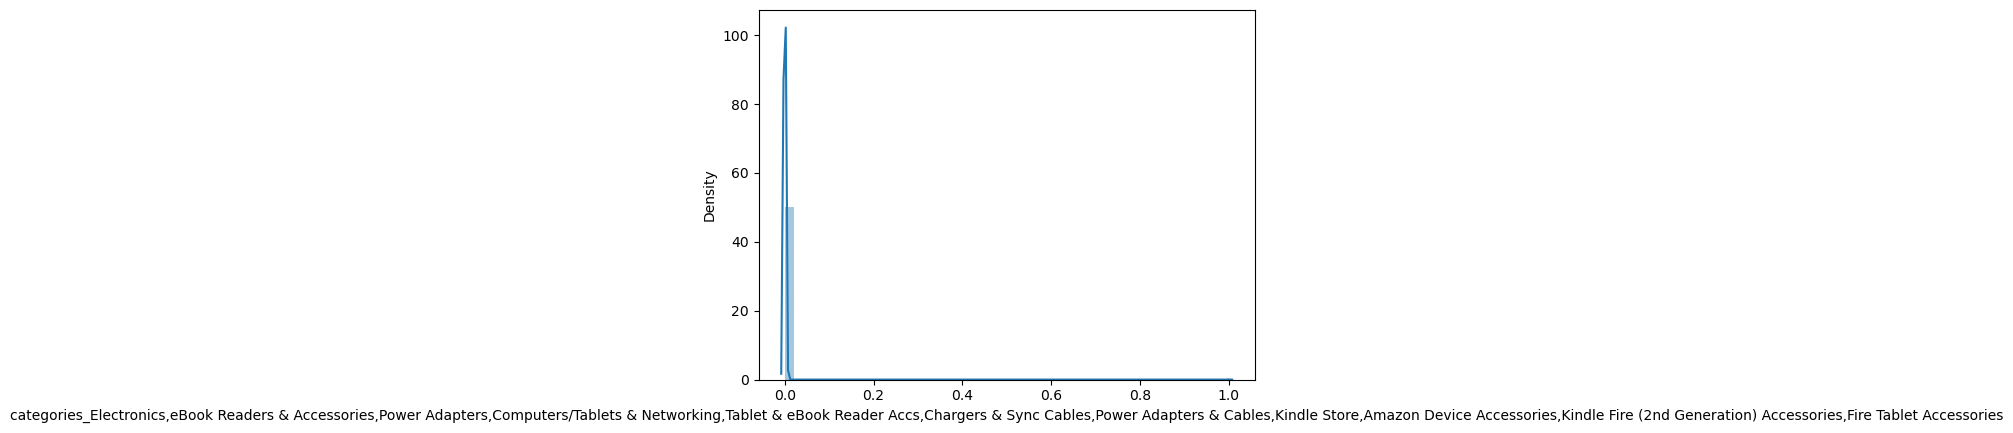

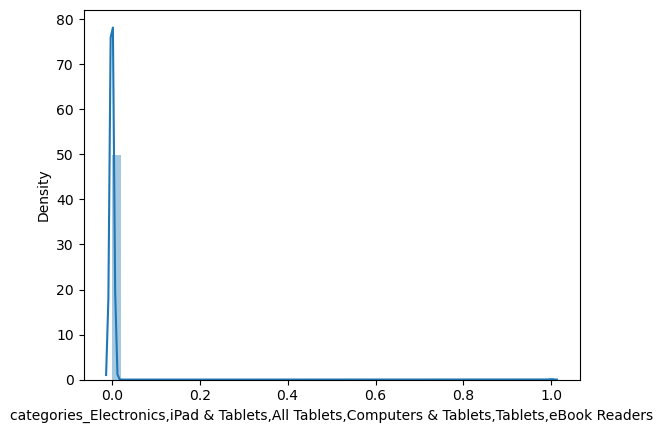

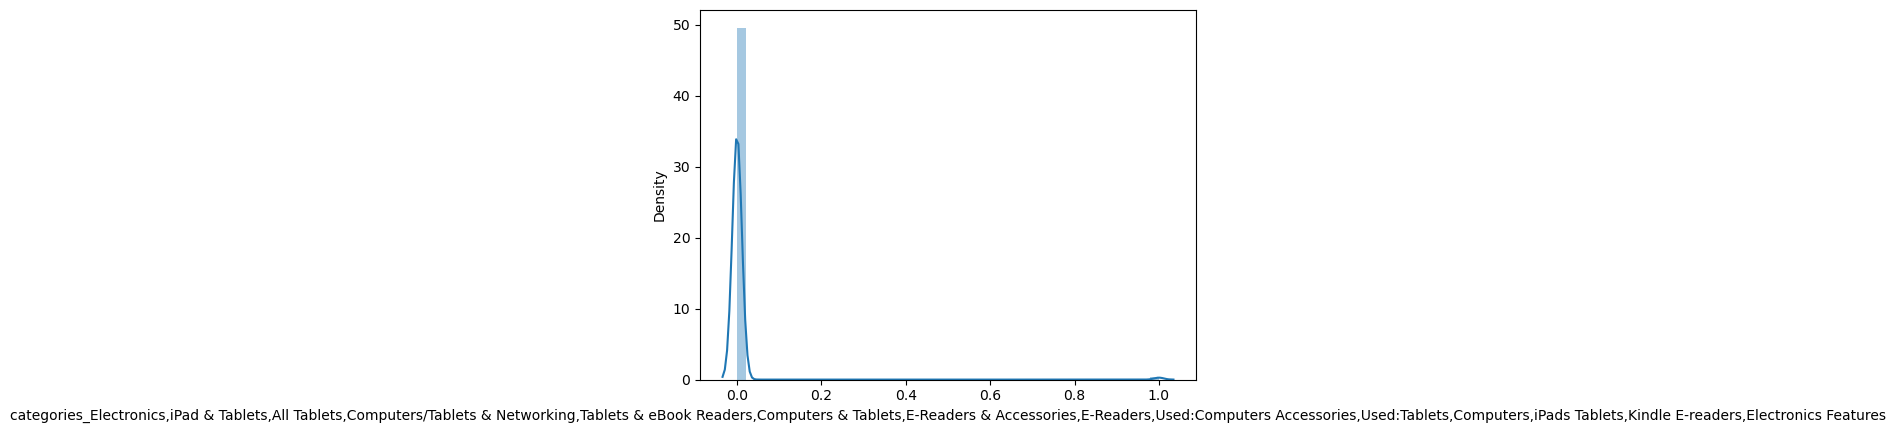

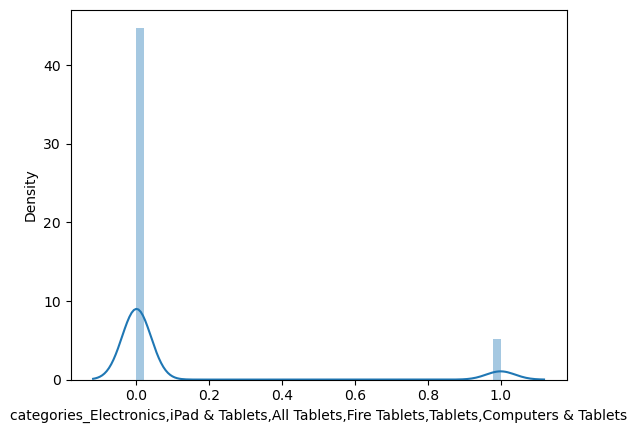

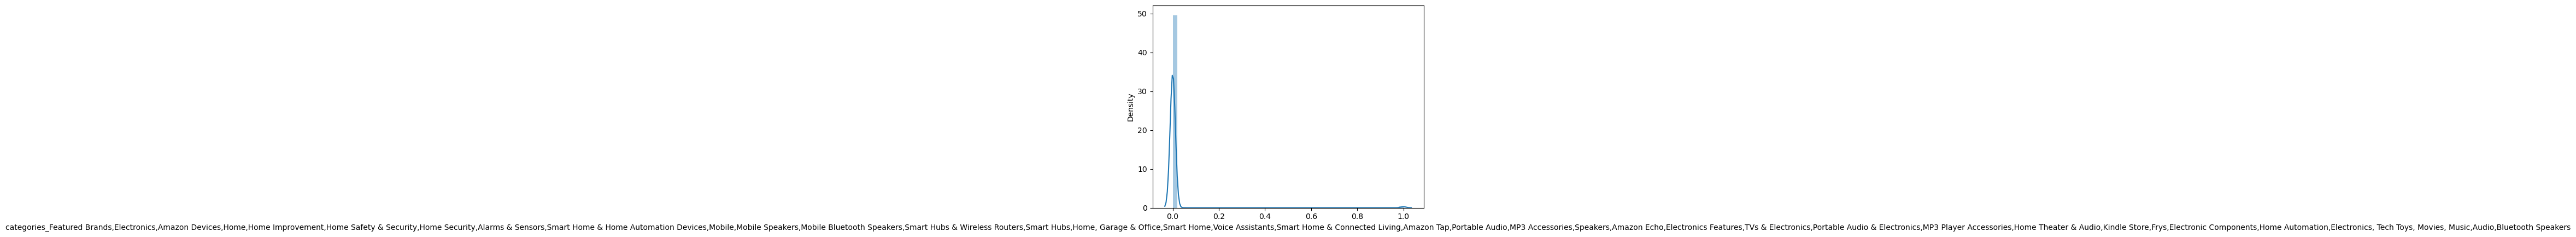

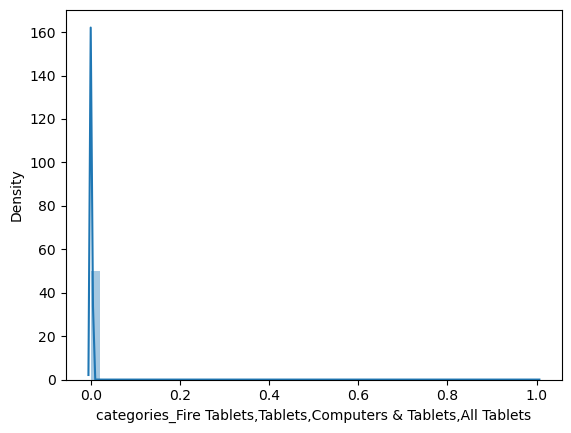

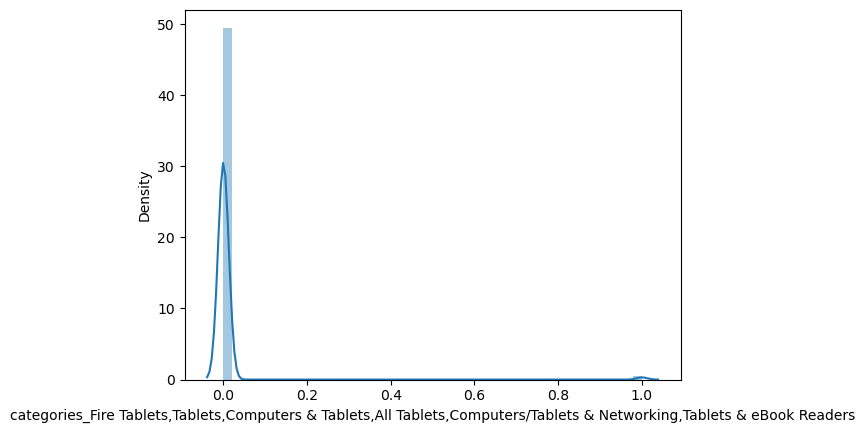

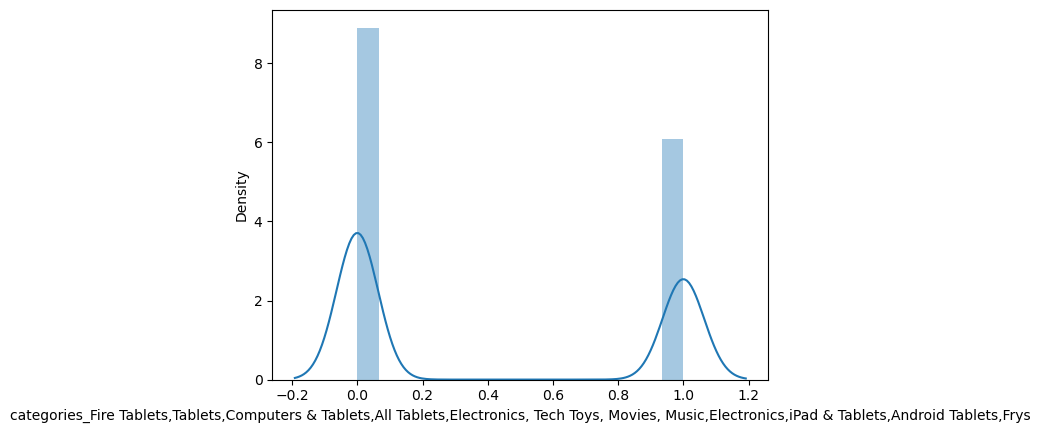

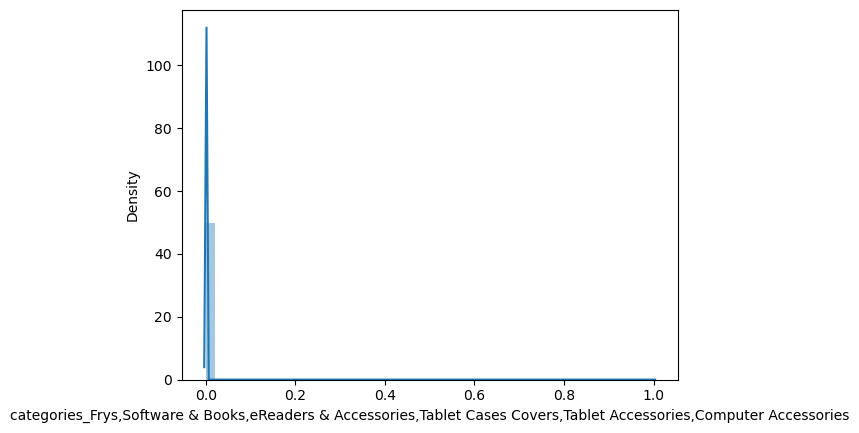

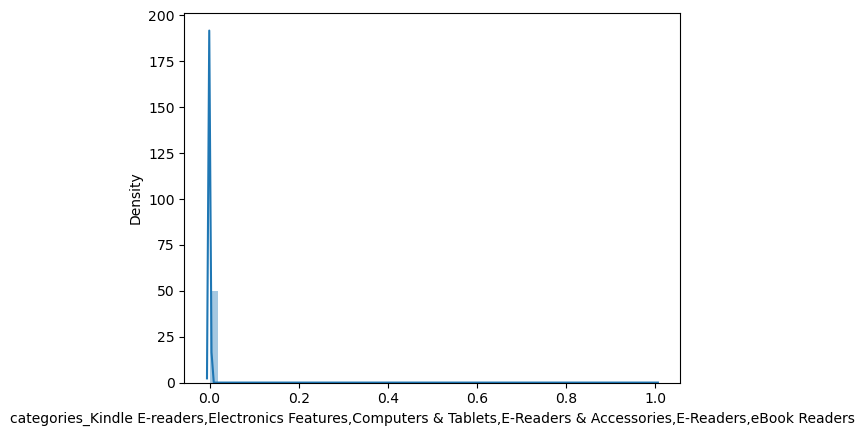

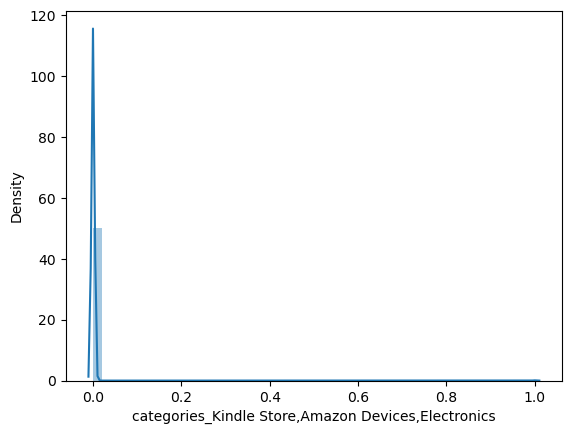

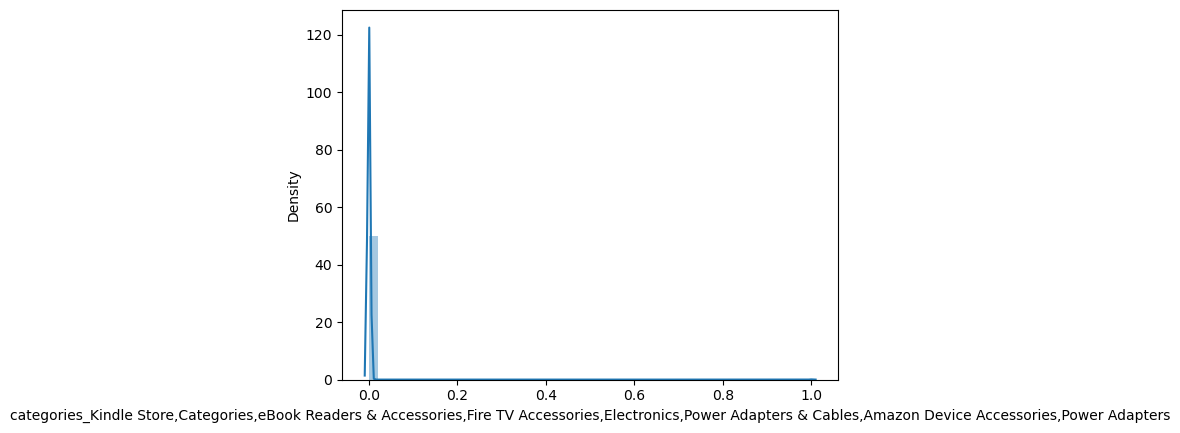

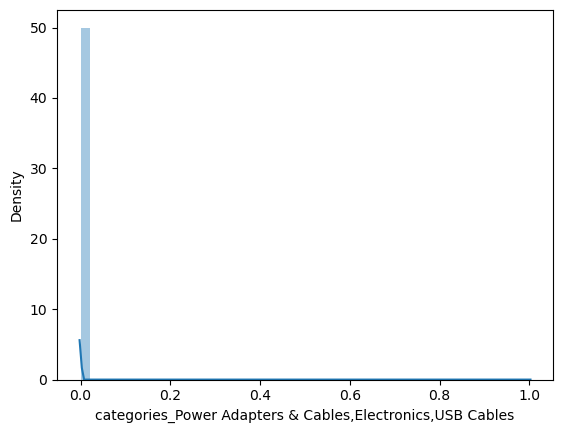

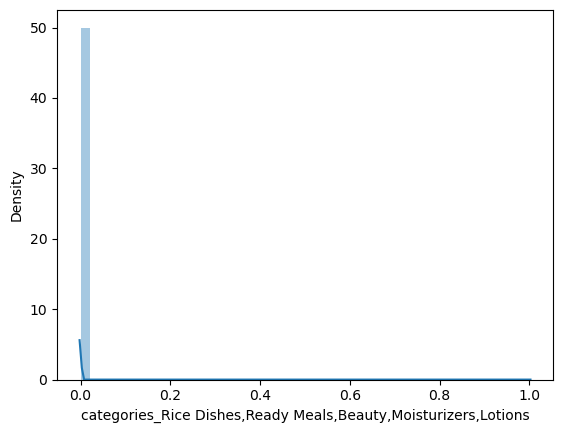

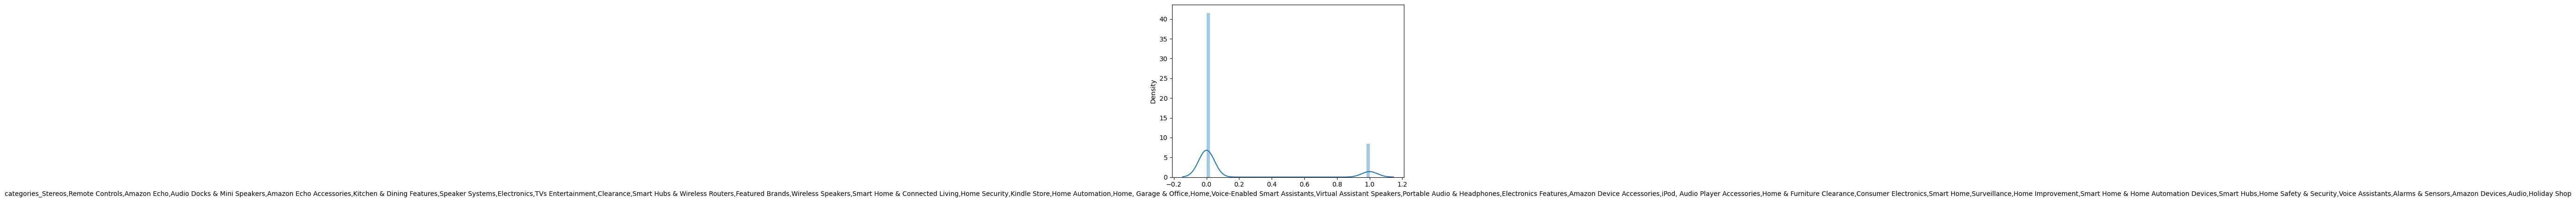

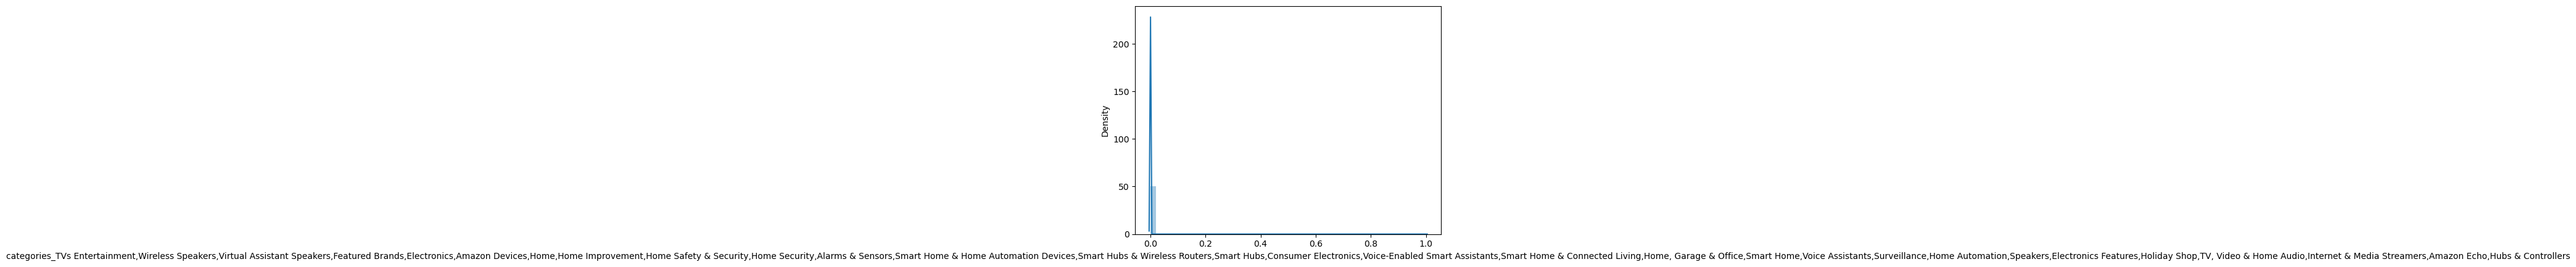

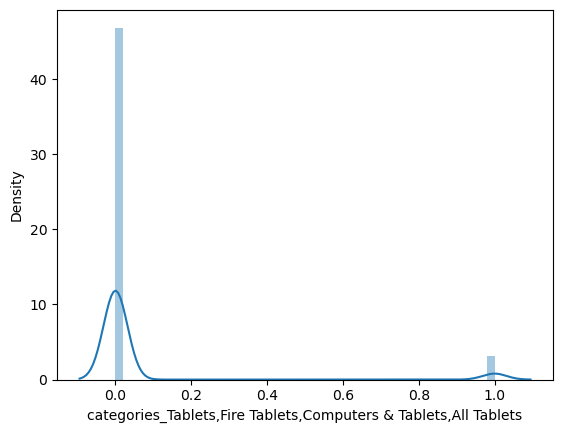

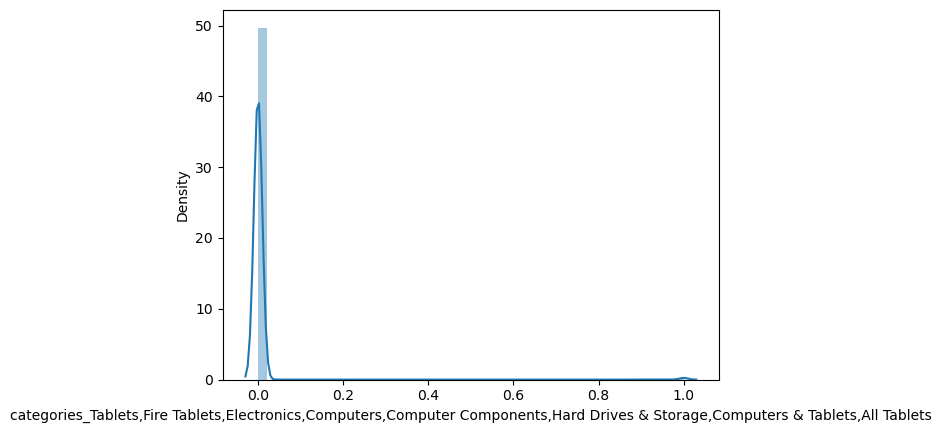

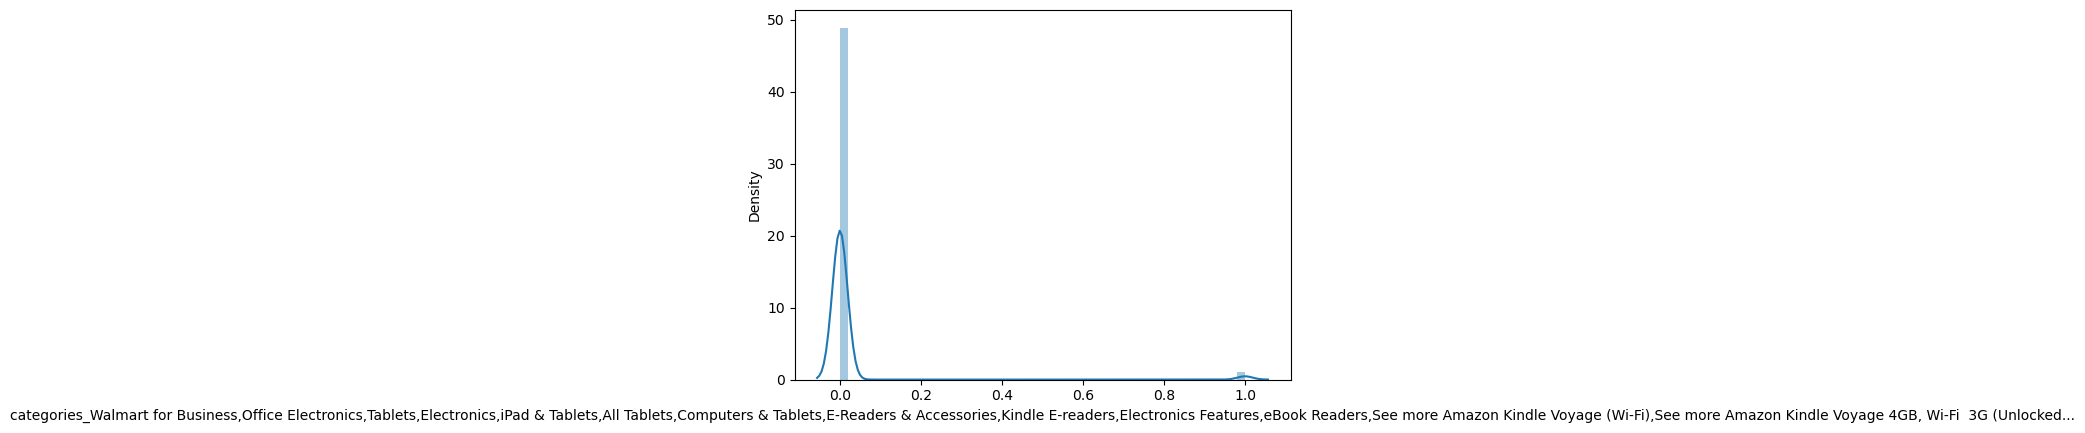

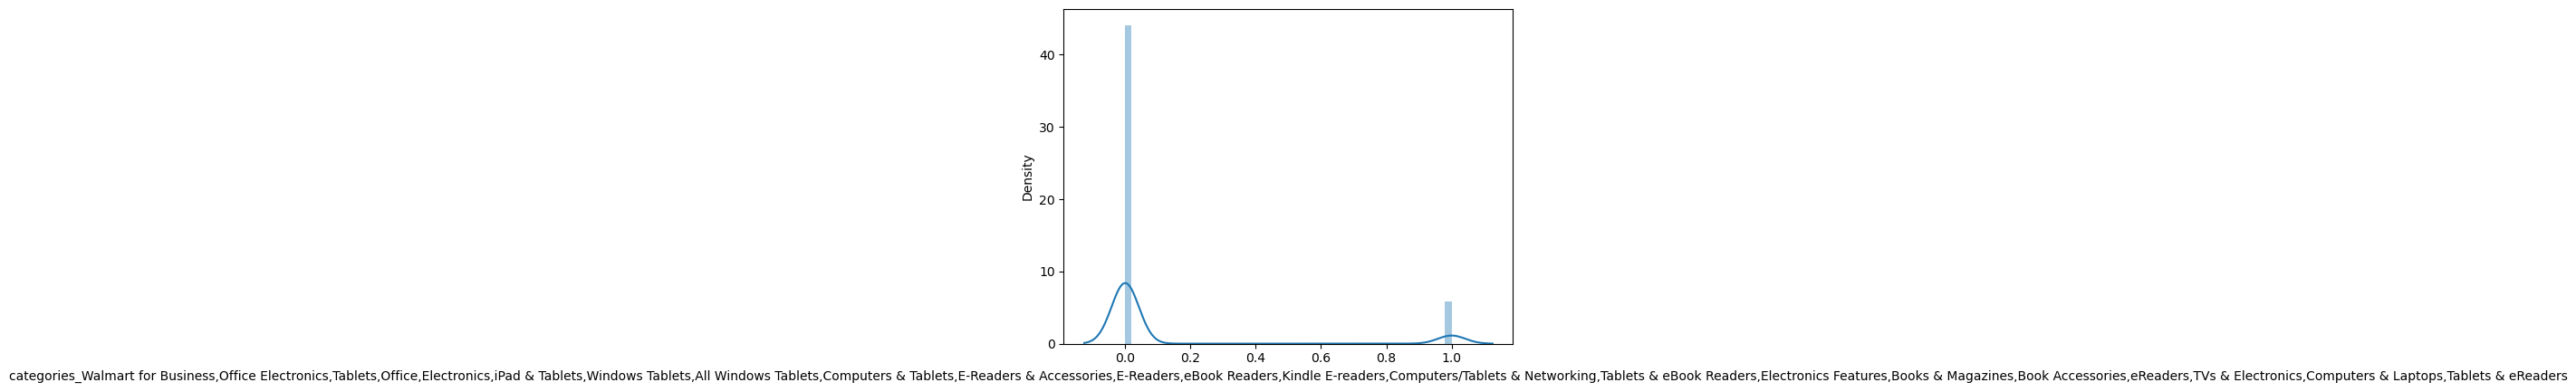

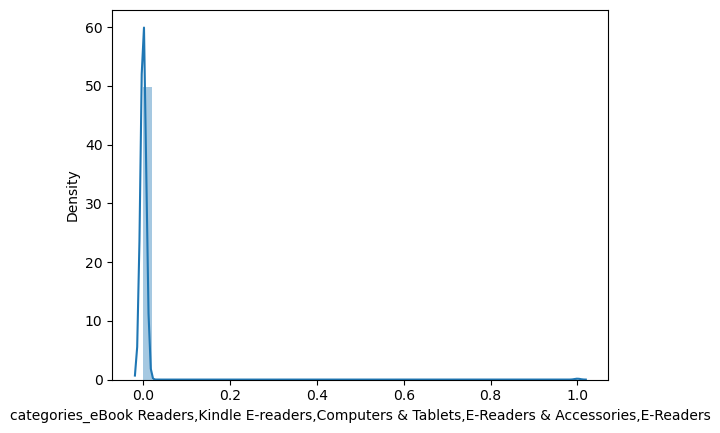

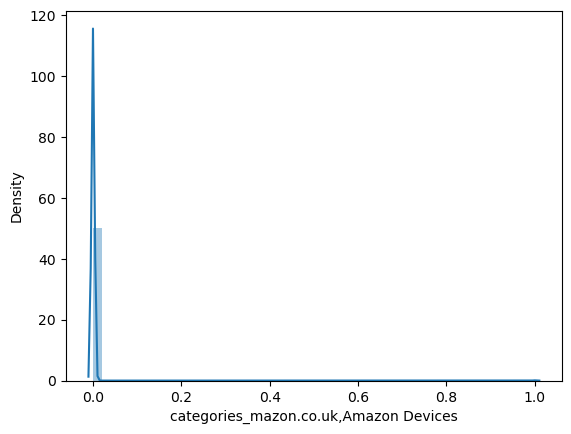

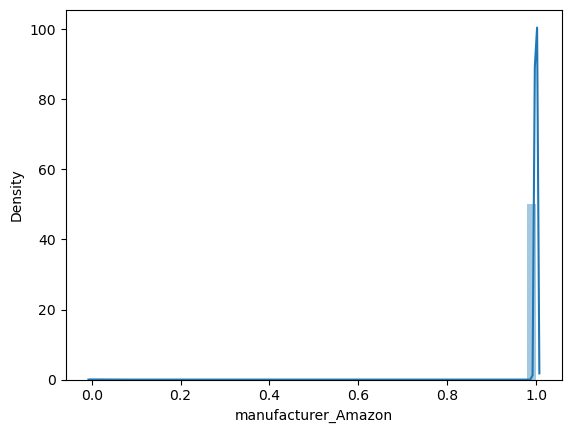

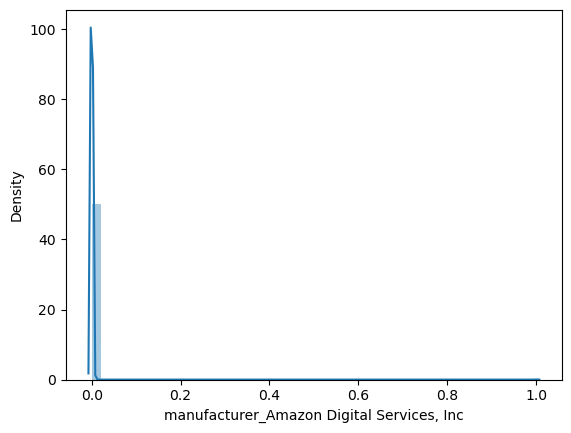

In [31]:
col =x.columns
for i in x[col]:
    plt.figure()
    sns.distplot(x[i])

In [32]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
lr=LinearRegression()

In [33]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train1 = lr.predict(x_train)
    pred_test1 = lr.predict(x_test)
    print("At Random State",i,"the traning accuracy is :-", r2_score(y_train,pred_train1))
    print("\n")

At Random State 0 the traning accuracy is :- 0.05795847409010779


At Random State 1 the traning accuracy is :- 0.06369469660122262


At Random State 2 the traning accuracy is :- 0.06068368887709341


At Random State 3 the traning accuracy is :- 0.06272028383841777


At Random State 4 the traning accuracy is :- 0.061035786551911


At Random State 5 the traning accuracy is :- 0.06273349675307871


At Random State 6 the traning accuracy is :- 0.05847627615376061


At Random State 7 the traning accuracy is :- 0.06141612208719549


At Random State 8 the traning accuracy is :- 0.06090366617589349


At Random State 9 the traning accuracy is :- 0.06425852721012493


At Random State 10 the traning accuracy is :- 0.054677249567350206


At Random State 11 the traning accuracy is :- 0.05826592929974794


At Random State 12 the traning accuracy is :- 0.059665730621291435


At Random State 13 the traning accuracy is :- 0.059800442265070086


At Random State 14 the traning accuracy is :- 0.061925815

At Random State 121 the traning accuracy is :- 0.060745045719205026


At Random State 122 the traning accuracy is :- 0.05951586560749034


At Random State 123 the traning accuracy is :- 0.05971961255812297


At Random State 124 the traning accuracy is :- 0.06246545524427427


At Random State 125 the traning accuracy is :- 0.05744784347766796


At Random State 126 the traning accuracy is :- 0.06575746543829586


At Random State 127 the traning accuracy is :- 0.06392752094198872


At Random State 128 the traning accuracy is :- 0.06341310823587509


At Random State 129 the traning accuracy is :- 0.06308730574497123


At Random State 130 the traning accuracy is :- 0.06166297660528175


At Random State 131 the traning accuracy is :- 0.06373341563731061


At Random State 132 the traning accuracy is :- 0.060410994679849006


At Random State 133 the traning accuracy is :- 0.06212646374519193


At Random State 134 the traning accuracy is :- 0.061539102407152435


At Random State 135 the traning

At Random State 242 the traning accuracy is :- 0.051951756570566276


At Random State 243 the traning accuracy is :- 0.06295115795306416


At Random State 244 the traning accuracy is :- 0.05965596628599301


At Random State 245 the traning accuracy is :- 0.06372978668604101


At Random State 246 the traning accuracy is :- 0.06302929160101467


At Random State 247 the traning accuracy is :- 0.06318277450984433


At Random State 248 the traning accuracy is :- 0.0584467487352035


At Random State 249 the traning accuracy is :- 0.06282006828999376


At Random State 250 the traning accuracy is :- 0.0580937919667297


At Random State 251 the traning accuracy is :- 0.06016418511070887


At Random State 252 the traning accuracy is :- 0.06335565932181919


At Random State 253 the traning accuracy is :- 0.06224624599112005


At Random State 254 the traning accuracy is :- 0.05769167909658601


At Random State 255 the traning accuracy is :- 0.05651821145010294


At Random State 256 the traning acc

At Random State 363 the traning accuracy is :- 0.06030731875555373


At Random State 364 the traning accuracy is :- 0.05959211639277584


At Random State 365 the traning accuracy is :- 0.06250865100340974


At Random State 366 the traning accuracy is :- 0.05924756346735349


At Random State 367 the traning accuracy is :- 0.06304230550729828


At Random State 368 the traning accuracy is :- 0.05825934948343747


At Random State 369 the traning accuracy is :- 0.05786006862094695


At Random State 370 the traning accuracy is :- 0.061142105294589855


At Random State 371 the traning accuracy is :- 0.06306359465815692


At Random State 372 the traning accuracy is :- 0.058746489257203494


At Random State 373 the traning accuracy is :- 0.06696056073830503


At Random State 374 the traning accuracy is :- 0.059916750620450654


At Random State 375 the traning accuracy is :- 0.06213910178453652


At Random State 376 the traning accuracy is :- 0.06354589817575851


At Random State 377 the traning

At Random State 484 the traning accuracy is :- 0.06442965527624867


At Random State 485 the traning accuracy is :- 0.060377900774009396


At Random State 486 the traning accuracy is :- 0.06337954577206029


At Random State 487 the traning accuracy is :- 0.06271694080698076


At Random State 488 the traning accuracy is :- 0.06506591448100096


At Random State 489 the traning accuracy is :- 0.06429422921326522


At Random State 490 the traning accuracy is :- 0.060046493354183106


At Random State 491 the traning accuracy is :- 0.06117829059768676


At Random State 492 the traning accuracy is :- 0.060836687981179804


At Random State 493 the traning accuracy is :- 0.059311192932279155


At Random State 494 the traning accuracy is :- 0.057749485127256306


At Random State 495 the traning accuracy is :- 0.05922446884614596


At Random State 496 the traning accuracy is :- 0.06463169128985469


At Random State 497 the traning accuracy is :- 0.06377755912921945


At Random State 498 the trani

At Random State 603 the traning accuracy is :- 0.06337238618386165


At Random State 604 the traning accuracy is :- 0.058037306225088625


At Random State 605 the traning accuracy is :- 0.06131001341559039


At Random State 606 the traning accuracy is :- 0.06221407691038772


At Random State 607 the traning accuracy is :- 0.062061043681781225


At Random State 608 the traning accuracy is :- 0.05894800209005169


At Random State 609 the traning accuracy is :- 0.060663994988907066


At Random State 610 the traning accuracy is :- 0.06398612369746648


At Random State 611 the traning accuracy is :- 0.06121320684166709


At Random State 612 the traning accuracy is :- 0.05472395910033734


At Random State 613 the traning accuracy is :- 0.0588607582757561


At Random State 614 the traning accuracy is :- 0.06413097065219309


At Random State 615 the traning accuracy is :- 0.06184937342328922


At Random State 616 the traning accuracy is :- 0.04834503256130418


At Random State 617 the traning 

At Random State 724 the traning accuracy is :- 0.0604820142637823


At Random State 725 the traning accuracy is :- 0.06257585510438468


At Random State 726 the traning accuracy is :- 0.06170551432573279


At Random State 727 the traning accuracy is :- 0.05923187837404287


At Random State 728 the traning accuracy is :- 0.06316216955588749


At Random State 729 the traning accuracy is :- 0.06392795656813033


At Random State 730 the traning accuracy is :- 0.0629392487963063


At Random State 731 the traning accuracy is :- 0.059020776921787976


At Random State 732 the traning accuracy is :- 0.06321130893928317


At Random State 733 the traning accuracy is :- 0.05634500879554383


At Random State 734 the traning accuracy is :- 0.060660067889454106


At Random State 735 the traning accuracy is :- 0.06425774002154494


At Random State 736 the traning accuracy is :- 0.06445478992027587


At Random State 737 the traning accuracy is :- 0.06072027869131713


At Random State 738 the traning ac

At Random State 844 the traning accuracy is :- 0.06380161860887723


At Random State 845 the traning accuracy is :- 0.06126819503388037


At Random State 846 the traning accuracy is :- 0.06157993306790721


At Random State 847 the traning accuracy is :- 0.06119644826312742


At Random State 848 the traning accuracy is :- 0.06282924672299972


At Random State 849 the traning accuracy is :- 0.06012499954806305


At Random State 850 the traning accuracy is :- 0.06342340689480586


At Random State 851 the traning accuracy is :- 0.06311695903960512


At Random State 852 the traning accuracy is :- 0.059437018020049526


At Random State 853 the traning accuracy is :- 0.06290679846790126


At Random State 854 the traning accuracy is :- 0.05982054874171017


At Random State 855 the traning accuracy is :- 0.058228025552827245


At Random State 856 the traning accuracy is :- 0.06302310806628875


At Random State 857 the traning accuracy is :- 0.0611791033080592


At Random State 858 the traning a

At Random State 963 the traning accuracy is :- 0.047948000321131


At Random State 964 the traning accuracy is :- 0.06672674161965819


At Random State 965 the traning accuracy is :- 0.0616524121113059


At Random State 966 the traning accuracy is :- 0.05925123632966467


At Random State 967 the traning accuracy is :- 0.05940570748158691


At Random State 968 the traning accuracy is :- 0.059552696842121944


At Random State 969 the traning accuracy is :- 0.05978970427367758


At Random State 970 the traning accuracy is :- 0.061645937716419796


At Random State 971 the traning accuracy is :- 0.06211831185932537


At Random State 972 the traning accuracy is :- 0.05642087944707708


At Random State 973 the traning accuracy is :- 0.059582252820150394


At Random State 974 the traning accuracy is :- 0.06207435441160969


At Random State 975 the traning accuracy is :- 0.059329154666945993


At Random State 976 the traning accuracy is :- 0.05796595084113709


At Random State 977 the traning a

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [36]:
y_predrf = rf.predict(x_test)
y_predrf

array([4.51614271, 4.51614271, 4.45877075, ..., 4.45877075, 4.45877075,
       4.45877075])

In [37]:
r2_score(y_train, rf.predict(x_train))

0.040546267559189775

In [39]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [40]:
# Predicting the test set results
y_preddt = dt.predict(x_test)
y_preddt

array([4.52145395, 4.52145395, 4.45882219, ..., 4.45882219, 4.45882219,
       4.45882219])